In [1]:
# %pip install openpyxl
# %pip install statsmodels
# %pip install plotly
# %pip install nbformat
# %pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import os
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [3]:
df = pd.read_excel('./total.xlsx') # 평림댐 데이터를 불러옴

In [4]:
df.info(), df.columns # 정보와 칼럼명 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3653 non-null   object 
 1   ELm     3653 non-null   float64
 2   rsqty   3653 non-null   float64
 3   rsrt    3653 non-null   float64
 4   rainF   3653 non-null   float64
 5   iqty    3653 non-null   float64
 6   dcat    3653 non-null   float64
dtypes: float64(6), object(1)
memory usage: 199.9+ KB


(None,
 Index(['date', 'ELm', 'rsqty', 'rsrt', 'rainF', 'iqty', 'dcat'], dtype='object'))

In [5]:
df = pd.DataFrame(df) # 불러온 df를 dataframe으로 만들어줌.
df.info() # df의 정보를 확인함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3653 non-null   object 
 1   ELm     3653 non-null   float64
 2   rsqty   3653 non-null   float64
 3   rsrt    3653 non-null   float64
 4   rainF   3653 non-null   float64
 5   iqty    3653 non-null   float64
 6   dcat    3653 non-null   float64
dtypes: float64(6), object(1)
memory usage: 199.9+ KB


In [6]:
df['date'] = pd.to_datetime(df['date']) # 데이터 타입이 object였던 ['일시']를 datetime으로 변환함.

In [7]:
df1 = df.sort_values(by=['date']) # datetime인 ['일시']를 오름차순으로 정렬함.

In [8]:
pd.set_option('display.max_columns', None) # 전체 칼럼을 보여줌
pd.set_option('display.max_rows', None) # 전체 로우를 보여줌

#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20

In [9]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

In [10]:
df1

,date,ELm,rsqty,rsrt,rainF,iqty,dcat
3652,2012-01-01,105.70,5.6750,55.1,0.1,0.074,0.236
3651,2012-01-02,105.68,5.6620,55.0,0.0,0.090,0.240
3650,2012-01-03,105.65,5.6420,54.8,2.0,0.003,0.234
3649,2012-01-04,105.64,5.6350,54.7,1.4,0.151,0.232
3648,2012-01-05,105.62,5.6220,54.6,0.0,0.087,0.237
...,...,...,...,...,...,...,...
4,2021-12-27,108.55,7.4996,75.9,0.0,0.054,0.335
3,2021-12-28,108.53,7.4834,75.7,0.1,0.159,0.346
2,2021-12-29,108.50,7.4593,75.5,0.0,0.063,0.343
1,2021-12-30,108.48,7.4432,75.3,0.0,0.149,0.335


In [11]:
df1['date'].describe() #datetime은 describe()를 따로 해야함.

C:\Users\sksms\AppData\Local\Temp\ipykernel_19032\2733844406.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['date'].describe() #datetime은 describe()를 따로 해야함.


count                    3653
unique                   3653
top       2012-01-01 00:00:00
freq                        1
first     2012-01-01 00:00:00
last      2021-12-31 00:00:00
Name: date, dtype: object

In [12]:
df1['Year'] = df1['date'].dt.year + 11

In [13]:
df1

,date,ELm,rsqty,rsrt,rainF,iqty,dcat,Year
3652,2012-01-01,105.70,5.6750,55.1,0.1,0.074,0.236,2023
3651,2012-01-02,105.68,5.6620,55.0,0.0,0.090,0.240,2023
3650,2012-01-03,105.65,5.6420,54.8,2.0,0.003,0.234,2023
3649,2012-01-04,105.64,5.6350,54.7,1.4,0.151,0.232,2023
3648,2012-01-05,105.62,5.6220,54.6,0.0,0.087,0.237,2023
...,...,...,...,...,...,...,...,...
4,2021-12-27,108.55,7.4996,75.9,0.0,0.054,0.335,2032
3,2021-12-28,108.53,7.4834,75.7,0.1,0.159,0.346,2032
2,2021-12-29,108.50,7.4593,75.5,0.0,0.063,0.343,2032
1,2021-12-30,108.48,7.4432,75.3,0.0,0.149,0.335,2032


In [14]:
df1 = pd.get_dummies(data = df1, columns = ['Year'], prefix = 'Year') # 원핫인코딩 연도

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 3652 to 0
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3653 non-null   datetime64[ns]
 1   ELm        3653 non-null   float64       
 2   rsqty      3653 non-null   float64       
 3   rsrt       3653 non-null   float64       
 4   rainF      3653 non-null   float64       
 5   iqty       3653 non-null   float64       
 6   dcat       3653 non-null   float64       
 7   Year_2023  3653 non-null   uint8         
 8   Year_2024  3653 non-null   uint8         
 9   Year_2025  3653 non-null   uint8         
 10  Year_2026  3653 non-null   uint8         
 11  Year_2027  3653 non-null   uint8         
 12  Year_2028  3653 non-null   uint8         
 13  Year_2029  3653 non-null   uint8         
 14  Year_2030  3653 non-null   uint8         
 15  Year_2031  3653 non-null   uint8         
 16  Year_2032  3653 non-null   uint8         


In [16]:
df1.describe() # 기술적 통계 확인

,ELm,rsqty,rsrt,rainF,iqty,dcat,Year_2023,Year_2024,Year_2025,Year_2026,Year_2027,Year_2028,Year_2029,Year_2030,Year_2031,Year_2032
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,106.361790,6.230398,60.780920,3.791076,0.451399,0.444233,0.100192,0.099918,0.099918,0.099918,0.100192,0.099918,0.099918,0.099918,0.100192,0.099918
std,2.766268,1.745790,17.240061,13.072558,1.328727,0.941830,0.300296,0.299932,0.299932,0.299932,0.300296,0.299932,0.299932,0.299932,0.300296,0.299932
min,96.950000,1.587000,0.000000,0.000000,0.000000,0.041000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.690000,5.025000,48.900000,0.000000,0.131000,0.316000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107.000000,6.332000,61.700000,0.000000,0.214000,0.353000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,108.600000,7.736000,75.600000,0.900000,0.377000,0.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110.130000,9.163000,89.000000,208.000000,39.255000,38.770000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df1.columns # 컬럼 확인

Index(['date', 'ELm', 'rsqty', 'rsrt', 'rainF', 'iqty', 'dcat', 'Year_2023',
       'Year_2024', 'Year_2025', 'Year_2026', 'Year_2027', 'Year_2028',
       'Year_2029', 'Year_2030', 'Year_2031', 'Year_2032'],
      dtype='object')

In [18]:
df1 = df1.reset_index(drop=True) # 정렬된 데이터의 인덱스를 재설정

In [19]:
df1

,date,ELm,rsqty,rsrt,rainF,iqty,dcat,Year_2023,Year_2024,Year_2025,Year_2026,Year_2027,Year_2028,Year_2029,Year_2030,Year_2031,Year_2032
0,2012-01-01,105.70,5.6750,55.1,0.1,0.074,0.236,1,0,0,0,0,0,0,0,0,0
1,2012-01-02,105.68,5.6620,55.0,0.0,0.090,0.240,1,0,0,0,0,0,0,0,0,0
2,2012-01-03,105.65,5.6420,54.8,2.0,0.003,0.234,1,0,0,0,0,0,0,0,0,0
3,2012-01-04,105.64,5.6350,54.7,1.4,0.151,0.232,1,0,0,0,0,0,0,0,0,0
4,2012-01-05,105.62,5.6220,54.6,0.0,0.087,0.237,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2021-12-27,108.55,7.4996,75.9,0.0,0.054,0.335,0,0,0,0,0,0,0,0,0,1
3649,2021-12-28,108.53,7.4834,75.7,0.1,0.159,0.346,0,0,0,0,0,0,0,0,0,1
3650,2021-12-29,108.50,7.4593,75.5,0.0,0.063,0.343,0,0,0,0,0,0,0,0,0,1
3651,2021-12-30,108.48,7.4432,75.3,0.0,0.149,0.335,0,0,0,0,0,0,0,0,0,1


In [20]:
# 데이터셋을 정제할 때, 특성별로 데이터 스케일이 다르면 안되기 때문에 이 작업을 통해 모든 특성의 범위를 같게 만들어줘야함
# 전체 데이터가 아닌 훈련 데이터에 대해서만 fit() 적용

df1.columns


Index(['date', 'ELm', 'rsqty', 'rsrt', 'rainF', 'iqty', 'dcat', 'Year_2023',
       'Year_2024', 'Year_2025', 'Year_2026', 'Year_2027', 'Year_2028',
       'Year_2029', 'Year_2030', 'Year_2031', 'Year_2032'],
      dtype='object')

In [21]:
train = df1[:3288]
test = df1[3288:]
train_X = train[['ELm', 'rsrt', 'rainF', 'iqty','dcat']]
train_y = train[['rsqty']]
test_X = train[['ELm', 'rsrt', 'rainF', 'iqty','dcat']]
test_y = train[['rsqty']]

In [22]:
params = {
    'n_estimators':(100, 500),
    'max_depth' : (5, 15),
    'min_samples_leaf' : (3, 18),
    'min_samples_split' : (3, 18)
}

rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_X, train_y)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

c:\Users\sksms\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
최적 예측 정확도: 0.9627


In [23]:
rf_run = RandomForestRegressor(random_state=0, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=100)
rf_run.fit(train_X, train_y)

C:\Users\sksms\AppData\Local\Temp\ipykernel_19032\2636370034.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_run.fit(train_X, train_y)


RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=3,
                      random_state=0)

In [24]:
train_predict = rf_run.predict(train_X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, train_y))))

RMSE':0.01004018319478675


In [25]:
pd.DataFrame(train_predict)

,0
0,5.642969
1,5.616390
2,5.607274
3,5.624956
4,5.613630
...,...
3283,6.963814
3284,6.945455
3285,6.923730
3286,6.919426


In [26]:
rf_run_predict = rf_run.predict(test_X)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, test_y))))

RMSE':0.01004018319478675


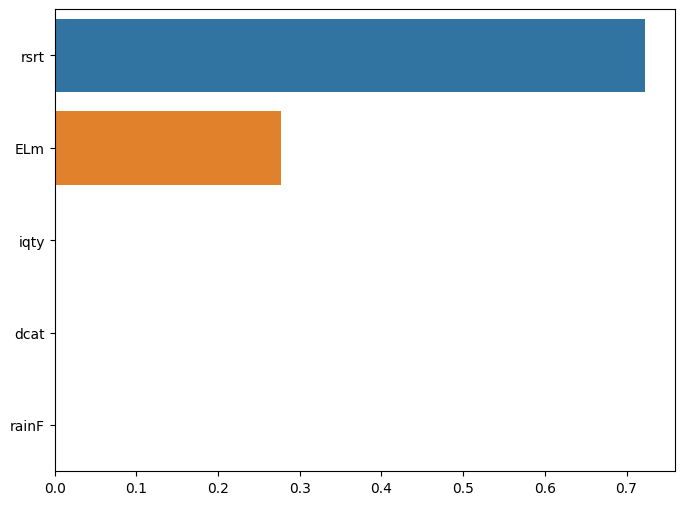

In [27]:
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()


In [28]:
df1.corr()

,ELm,rsqty,rsrt,rainF,iqty,dcat,Year_2023,Year_2024,Year_2025,Year_2026,Year_2027,Year_2028,Year_2029,Year_2030,Year_2031,Year_2032
ELm,1.000000,0.988045,0.984688,0.024074,0.098744,0.119402,0.033241,0.300897,0.020038,0.095153,-0.092120,-0.628301,-0.178986,0.027579,0.245977,0.176294
rsqty,0.988045,1.000000,0.996363,0.024906,0.107886,0.128743,0.048994,0.350325,0.025726,0.097949,-0.112494,-0.579745,-0.160896,0.010171,0.179438,0.140390
rsrt,0.984688,0.996363,1.000000,0.025150,0.106328,0.126345,0.043174,0.344080,0.023976,0.095185,-0.112468,-0.581921,-0.160117,0.009149,0.175094,0.163720
rainF,0.024074,0.024906,0.025150,1.000000,0.732477,0.398045,0.015504,-0.010276,-0.000883,-0.017853,-0.004146,-0.025961,0.008133,-0.004773,0.039638,0.000556
iqty,0.098744,0.107886,0.106328,0.732477,1.000000,0.749800,0.059050,-0.004141,-0.002411,-0.033143,-0.003831,-0.043046,0.011097,-0.020495,0.054522,-0.017735
dcat,0.119402,0.128743,0.126345,0.398045,0.749800,1.000000,0.051789,0.017199,-0.014697,-0.011647,0.003549,-0.042485,-0.026826,-0.034410,0.085816,-0.028460
Year_2023,0.033241,0.048994,0.043174,0.015504,0.059050,0.051789,1.000000,-0.111179,-0.111179,-0.111179,-0.111348,-0.111179,-0.111179,-0.111179,-0.111348,-0.111179
Year_2024,0.300897,0.350325,0.344080,-0.010276,-0.004141,0.017199,-0.111179,1.000000,-0.111010,-0.111010,-0.111179,-0.111010,-0.111010,-0.111010,-0.111179,-0.111010
Year_2025,0.020038,0.025726,0.023976,-0.000883,-0.002411,-0.014697,-0.111179,-0.111010,1.000000,-0.111010,-0.111179,-0.111010,-0.111010,-0.111010,-0.111179,-0.111010
Year_2026,0.095153,0.097949,0.095185,-0.017853,-0.033143,-0.011647,-0.111179,-0.111010,-0.111010,1.000000,-0.111179,-0.111010,-0.111010,-0.111010,-0.111179,-0.111010


In [29]:
import plotly.express as px

fig = px.line(df1, x="date", y="rsqty", title='평림댐 저수량')
fig.show()

In [30]:
fig = px.line(df1, x="date", y="ELm", title='평림댐 수위')
fig.show()

In [31]:
fig = px.line(df1, x="date", y="rsrt", title='평림댐 저수율')
fig.show()

In [32]:
fig = px.line(df1, x="date", y="rainF", title='평림댐 강우량')
fig.show()

In [33]:
fig = px.line(df1, x="date", y="iqty", title='평림댐 유입량')
fig.show()

In [34]:
fig = px.line(df1, x="date", y="dcat", title='평림댐 총방류랑')
fig.show()

<AxesSubplot: xlabel='rsqty', ylabel='Density'>

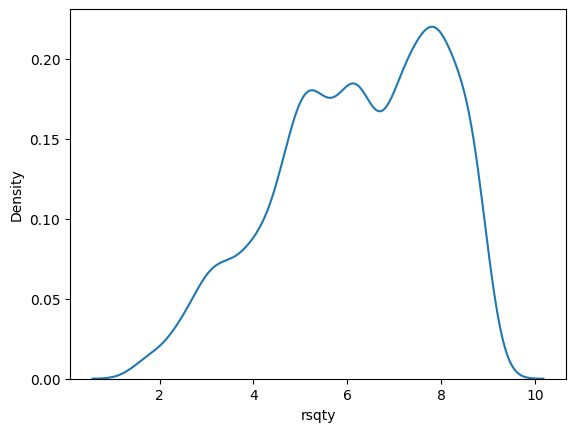

In [35]:
sns.kdeplot(df1['rsqty'])

In [36]:
result = pd.DataFrame(train_predict)

In [37]:
result

,0
0,5.642969
1,5.616390
2,5.607274
3,5.624956
4,5.613630
...,...
3283,6.963814
3284,6.945455
3285,6.923730
3286,6.919426


In [38]:
test_predict = rf_run.predict(test_X)

In [39]:
test_predict

array([5.64296938, 5.61639032, 5.60727408, ..., 6.92373008, 6.91942613,
       6.89634981])

In [40]:
result2 = pd.DataFrame(test_predict)

In [43]:
# result2['Year'] = df1['date'].dt.year + 11
# result2['Month'] = df1['date'].dt.month
date = str(df1['date'].dt.date)
date2 = date[:-2]
date2
# result2['date'] = (df1['date'].dt.date)
# result2

0       2012-01-01
1       2012-01-02
2       2012-01-03
3       2012-01-04
4       2012-01-05
           ...    
3646    2021-12-25
3647    2021-12-26
3648    2021-12-27
3649    2021-12-28
3650    2021-12-29
Name: date, Length: 3651, dtype: object